<h1><font color=#000066	> Advanced Systems Project: Data Analysis on YELP application reviews. </font></h1>

<br/><i>Analysis performed by: Sujeeth Nidumolu 
<br>Student ID: 700372902</br>
<br>Term: Fall-2018</br>
<br>Computer Information Systems - University of Central Missouri</br></i>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

We have seen that a more number of positive reviews were posted by the users in the whole dataset earlier, let us see will negative feedback affect the business?

### Taking one business with highest rating and one business with lowest rating to compare the tips recorded by the users in both the cases:

In [4]:
business = pd.read_csv('yelp_business.csv')

As we have seen that 'Las Vegas' has recorded highest number of reviews in the data, we will consider Las Vegas for fetching the business with highest rating.

In [8]:
business[(business['city'] == 'Las Vegas') & (business['stars'] == 5.0)].sort_values(ascending=False, by="review_count")

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
13577,IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",Southwest,"""7380 S Rainbow Blvd, Ste 101""",Las Vegas,NV,89139,36.054195,-115.242443,5.0,1165,1,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
83265,tIX6o1jkLrrmsJIdGUjA5A,"""Eco-Tint""",NaN,"""4510 W Diablo Dr, Ste A102""",Las Vegas,NV,89118,36.090223,-115.202364,5.0,527,1,Auto Customization;Car Window Tinting;Auto Gla...
163978,Hp8k_RpSIWSeJguyaQpfIw,"""Gelatology""",Southwest,"""7910 S Rainbow Blvd, Ste 110""",Las Vegas,NV,89139,36.044453,-115.242902,5.0,506,1,Ice Cream & Frozen Yogurt;Gelato;Food;Desserts
53532,56_j_lcGj5X9SpM2KzLm4A,"""Fabulous Eyebrow Threading""",Westside,"""2960 S Durango Dr, Ste 112""",Las Vegas,NV,89117,36.135543,-115.277850,5.0,475,1,Eyebrow Services;Eyelash Service;Hair Removal;...
172246,IZKjHtCuRlbhyD1WtGd8uA,"""Free Vegas Club Passes""",Southeast,"""""",Las Vegas,NV,89120,36.083335,-115.099975,5.0,409,1,Nightlife;Party & Event Planning;Dance Clubs;E...
107551,qHQPvp6pZ75fB63kOKUPqg,"""Carpet Monkeys""",Southwest,"""8985 S Durango Dr""",Las Vegas,NV,89113,36.025409,-115.281533,5.0,393,1,Home Services;Damage Restoration;Carpet Cleani...
35662,qNGexUR4IG8eSfs7USrRtA,"""Battlefield Vegas""",NaN,"""2771 Industrial Rd""",Las Vegas,NV,89109,36.139019,-115.168451,5.0,383,1,Gun/Rifle Ranges;Active Life;Guns & Ammo;Shopping
123596,O7uA5Rlo4vIVoh7KthEEXg,"""Bulwark Exterminating""",NaN,"""2129 Industrial Rd""",Las Vegas,NV,89102,36.146899,-115.162491,5.0,373,1,Local Services;Pest Control
17673,Kp4i7on7rxFRkWceKfL2Ig,"""Paranormal - Mind Reading Magic Show""",The Strip,"""3645 Las Vegas Blvd S""",Las Vegas,NV,89109,36.114277,-115.170975,5.0,365,1,Casinos;Performing Arts;Arts & Entertainment;M...
152865,O7UMzd3i-Zk8dMeyY9ZwoA,"""Art of Flavors""",Downtown,"""1616 S Las Vegas Blvd, Ste 130""",Las Vegas,NV,89104,36.151555,-115.152610,5.0,352,0,Food;Gelato;Restaurants;Ice Cream & Frozen Yog...


"Brew Tea Bar" has the best rating with 5 stars and highest review count. Lets select "Brew Tea Bar" from the list.

In [9]:
business[business.name=='"Brew Tea Bar"']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
13577,IhNASEZ3XnBHmuuVnWdIwA,"""Brew Tea Bar""",Southwest,"""7380 S Rainbow Blvd, Ste 101""",Las Vegas,NV,89139,36.054195,-115.242443,5.0,1165,1,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
46266,1aVbXH_4uQCTQU7HfGmyow,"""Brew Tea Bar""",NaN,"""9480 S Eastern Ave, Ste 160""",Las Vegas,NV,89123,36.017287,-115.117185,5.0,111,1,Tea Rooms;Bubble Tea;Coffee & Tea;Food


Since there are two locations for "Brew Tea Bar", lets choose one of the location which has highest review_count.

In [10]:
business.loc[13577,:]

business_id                                IhNASEZ3XnBHmuuVnWdIwA
name                                               "Brew Tea Bar"
neighborhood                                            Southwest
address                            "7380 S Rainbow Blvd, Ste 101"
city                                                    Las Vegas
state                                                          NV
postal_code                                                 89139
latitude                                                  36.0542
longitude                                                -115.242
stars                                                           5
review_count                                                 1165
is_open                                                         1
categories      Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
Name: 13577, dtype: object

"Brew Tea Bar" at Southwest-neighborhood is selected which has highest count of reviews.

In [11]:
tip = pd.read_csv('yelp_tip.csv') #Reading and loading the Tips data

In [14]:
Brew_Tea_Bar = tip[tip.business_id==business.loc[13577,:].business_id]

In [15]:
usedWords = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 
                  'awful', 'wow', 'hate']#Feeding these common words into an array as token of words.

In [18]:
vectorizer = CountVectorizer(vocabulary=usedWords, lowercase=False) #CountVectorizer implements both tokenization and occurrence counting in a single class
Brew_Tea_Bar_Selected_Word_Count = \
vectorizer.fit_transform(Brew_Tea_Bar['text'].values.astype('U')) 
vectorizer.get_feature_names() ##Each term found by the analyzer during the fit is assigned a unique integer index corresponding to a column in the resulting matrix.

['awesome',
 'great',
 'fantastic',
 'amazing',
 'love',
 'horrible',
 'bad',
 'terrible',
 'awful',
 'wow',
 'hate']

In [20]:
word_count_array = Brew_Tea_Bar_Selected_Word_Count.toarray()
brewTeaBar = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
brewTeaBar

,Count
awesome,3
great,18
fantastic,2
amazing,10
love,23
horrible,0
bad,2
terrible,0
awful,0
wow,0


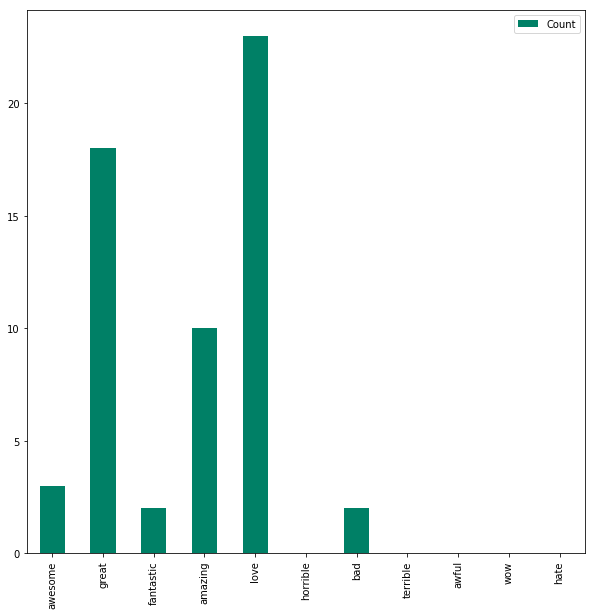

In [22]:
brewTeaBar.plot(kind='bar', stacked=False, figsize=[10,10], colormap='summer')

### Now let us take a look at the business with least rating and tips from the users for that business:

In [23]:
business[(business['city'] == 'Las Vegas') & (business['stars'] == 1.0)].sort_values(ascending=False, by="review_count")

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
71608,Wipy66VvmSaLLX7OMNlU2A,"""CenturyLink Store""",NaN,"""2101 N Rainbow Blvd, Ste 100""",Las Vegas,NV,89108,36.199388,-115.242569,1.0,155,1,Internet Service Providers;Professional Servic...
132982,ruFgApclJ4Mo3qEUwcklyA,"""West Coast Movers""",NaN,"""3555 W Quail Ave""",Las Vegas,NV,89118,36.083908,-115.187217,1.0,136,0,Home Services;Local Services;Movers;Packing Se...
103526,o2WmqEWfFa5Zw8uQae_Arw,"""Elite Moving & Storage Inc""",Chinatown,"""3651 Lindell Rd, Ste D188""",Las Vegas,NV,89103,36.123637,-115.216641,1.0,127,0,Home Services;Movers
50706,rsGqm4UHTp4NB4sr9ca1YA,"""Oasis Moving and Storage""",NaN,"""2915 Coleman St""",Las Vegas,NV,89032,36.212269,-115.176012,1.0,126,1,Home Services;Self Storage;Movers;Local Services
127430,h1Jq1YlqPyD1mGSW0sjRaQ,"""Centurylink""",Eastside,"""2340 E Tropicana Ave""",Las Vegas,NV,89119,36.100048,-115.119146,1.0,121,1,Television Service Providers;Professional Serv...
30280,Gw5e_DozTLjO-vz-LXD9og,"""Economy Car Rental""",Southeast,"""8174 Las Vegas Blvd S, Ste 102""",Las Vegas,NV,89123,36.040818,-115.170700,1.0,75,0,Hotels & Travel;Car Rental
60939,1OhW3wUWcwPsjo1PnBufZw,"""Ashley's Towing""",Westside,"""3030 Sheridan St""",Las Vegas,NV,89102,36.135468,-115.187931,1.0,66,1,Automotive;Towing
139341,gwYrrkILNCth1RAwIJHe9Q,"""FirstService Residential""",Southwest,"""8290 Arville St""",Las Vegas,NV,89139,36.041998,-115.198452,1.0,66,1,Property Management;Real Estate;Home Services
42006,LqQBvrgt12QiLvUD2Tal1A,"""Teleflora Fresh Flowers""",NaN,"""""",Las Vegas,NV,NaN,36.175000,-115.136389,1.0,66,0,Shopping;Florists;Flowers & Gifts
41786,883p8Iq1DGAcrP6GU5XRog,"""Executive Moving and Storage""",NaN,"""3651 W Ali Baba Ln, Ste 105""",Las Vegas,NV,89118,36.095122,-115.188312,1.0,56,1,Movers;Professional Services;Local Services;Se...


Century Link Store, which is a internet service provider has recorded lowest rating.

In [29]:
business[business.name=='"CenturyLink Store"']

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
37291,exYbm4d7B9g09j4nDBfy_Q,"""CenturyLink Store""",NaN,"""7857 W Bell Rd, Ste 107""",Peoria,AZ,85382,33.638071,-112.227033,1.5,9,1,Home Services;Television Service Providers;Int...
37606,kfs48Q5QpmBeWQ1fiCQzlw,"""CenturyLink Store""",NaN,"""7700 W Arrowhead Towne Ctr""",Glendale,AZ,85308,33.639641,-112.224602,2.0,14,1,Professional Services;Television Service Provi...
54015,nL4XDAXx4oWw31O9Ve-rfw,"""CenturyLink Store""",NaN,"""9617 N Metro Pkwy W""",Phoenix,AZ,85051,33.572757,-112.124016,1.0,7,1,Utilities;Internet Service Providers;Professio...
66422,bmm5F5smQrHCEkFYjwrQ9w,"""CenturyLink Store""",NaN,"""1321 W Sunset Rd""",Henderson,NV,89014,36.063178,-115.044107,1.5,85,1,Internet Service Providers;Professional Servic...
71608,Wipy66VvmSaLLX7OMNlU2A,"""CenturyLink Store""",NaN,"""2101 N Rainbow Blvd, Ste 100""",Las Vegas,NV,89108,36.199388,-115.242569,1.0,155,1,Internet Service Providers;Professional Servic...
81491,K13erNI8sT-FZ3kcX3RhGA,"""CenturyLink Store""",NaN,"""1229 S Power Rd, Ste 107""",Mesa,AZ,85206,33.392766,-111.684647,2.0,18,1,Home Services;Professional Services;Internet S...
87690,_UEQPDDiSgyYqjORWeLfJg,"""CenturyLink Store""",NaN,"""2668 Las Vegas Blvd N, Ste 1""",North Las Vegas,NV,89030,36.208232,-115.109406,1.0,29,1,Television Service Providers;IT Services & Com...
101481,lywduRzRWrZLD03L2ZINhQ,"""CenturyLink Store""",Southeast,"""9771 S Eastern Ave, Ste 105""",Las Vegas,NV,89123,36.011508,-115.119955,1.5,60,1,Utilities;Television Service Providers;Profess...
174315,AaKNGQ0Lh8Jbpj4zsuxxMA,"""CenturyLink Store""",NaN,"""2780 W Chandler Blvd, Ste 5""",Chandler,AZ,85224,33.305963,-111.890702,1.5,38,1,Utilities;Television Service Providers;Interne...


Since there are several stores, let us choose the one which has recorded highest number of reviews, i.e the one with location id as 71608

In [30]:
business.loc[71608,:]

business_id                                Wipy66VvmSaLLX7OMNlU2A
name                                          "CenturyLink Store"
neighborhood                                                  NaN
address                            "2101 N Rainbow Blvd, Ste 100"
city                                                    Las Vegas
state                                                          NV
postal_code                                                 89108
latitude                                                  36.1994
longitude                                                -115.243
stars                                                           1
review_count                                                  155
is_open                                                         1
categories      Internet Service Providers;Professional Servic...
Name: 71608, dtype: object

In [31]:
Century_Link_Store = tip[tip.business_id==business.loc[71608,:].business_id]

In [32]:
Century_Link_Store_Selected_Word_Count = \
vectorizer.fit_transform(Century_Link_Store['text'].values.astype('U'))

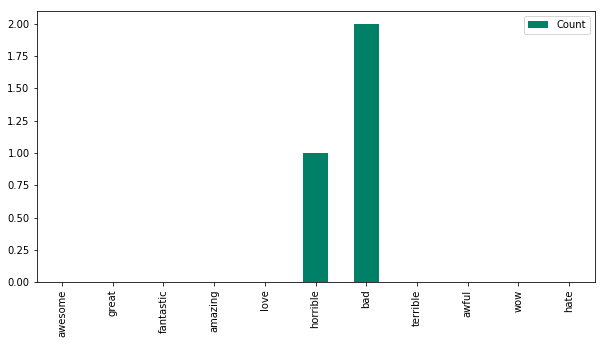

In [36]:
word_count_array = Century_Link_Store_Selected_Word_Count.toarray()
centuryLinkStore = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})
centuryLinkStore.plot(kind='bar', stacked=False, figsize=[10,5], colormap='summer')

### Conclusion: 

This says that for a high rated restaurant, the tips didn't show much impact on the stars since both of them ended with a positive note. However for Century Link Store, inspite of bad stars, users has recorded negative tips which might affect the business which says the service has to be improved by a greater margin to sustain in the market.